In [4]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [11]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [13]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [15]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [17]:
print(Base.classes.keys())

['measurement', 'station']


In [17]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)

conn = engine.connect()

# Exploratory Precipitation Analysis

In [22]:
# Find the most recent date in the data set.
latest_date =  session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23',)

2016-08-23


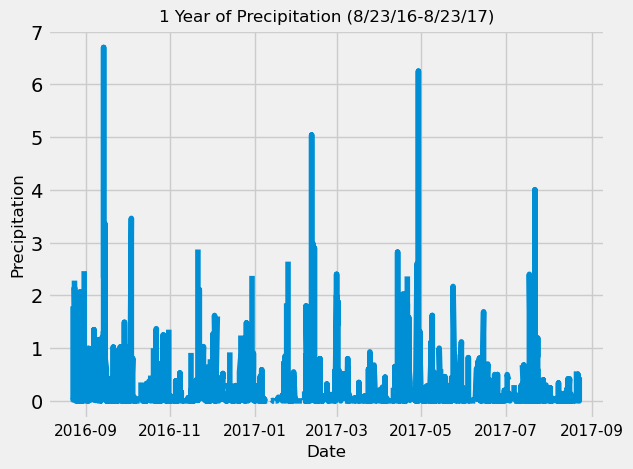

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
date_range = (dt.date(2017,8,23)) - (dt.timedelta(days=365))
print(date_range)

# Perform a query to retrieve the data and precipitation scores
precip_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= date_range)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_score_pd = pd.DataFrame(precip_scores, columns = ['date', 'precipitation'])

# Sort the dataframe by date
precip_score_pd['date'] = pd.to_datetime(precip_score_pd['date'])
precip_pd = precip_score_pd.sort_values(by=['date'])
precip_pd = precip_pd.set_index(precip_pd['date'])

# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(precip_pd.precipitation)

fontsize = 12
plt.xlabel('Date', fontsize=fontsize)
plt.ylabel('Precipitation', fontsize=fontsize)
plt.title('1 Year of Precipitation (8/23/16-8/23/17)', fontsize=fontsize)
plt.xticks(fontsize = (fontsize-1))


plt.show()

In [26]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = precip_pd['precipitation'].describe()
summary_statistics

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

# Exploratory Station Analysis

In [29]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station.station).group_by(Station.station).count()
total_stations

9

In [53]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = session.query(Measurement.station,(func.count(Measurement.tobs))).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc())

most_active_station = station_activity.first()
print(f'The most active station is {most_active_station.station} with {most_active_station[1]} observations.')

station_activity.all()

The most active station is USC00519281 with 2772 observations.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
top_station_temp = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station =='USC00519281')
top_station_temp.first()   
top_station_temp = pd.DataFrame(top_station_temp)
top_station_temp.head()

temps = top_station_temp['tobs']
print(f'Highest: {(temps).max()}, Lowest: {(temps.min())}, Average: {(temps).mean()}')

Highest: 85.0, Lowest: 54.0, Average: 71.66378066378067


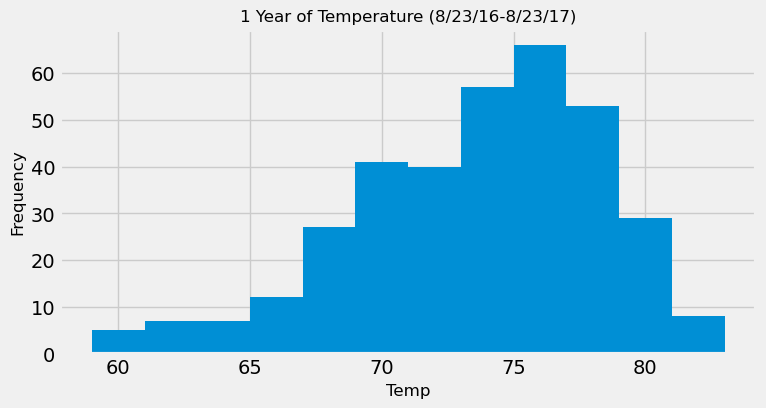

In [43]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_months_temp = session.query(Measurement.tobs, Measurement.date).filter(Measurement.date >= date_range).filter(Measurement.station == 'USC00519281')

last_12_months_temp_pd = pd.DataFrame(last_12_months_temp, columns=['tobs', 'date'])

last_12_months_temp_pd['date'] = pd.to_datetime(last_12_months_temp_pd['date'])
last_12_months_temp_pd = last_12_months_temp_pd.sort_values(by=['date'])
last_12_months_temp_pd = last_12_months_temp_pd.set_index(last_12_months_temp_pd['date'])


plt.figure(figsize=(8, 4))
last_12_months_temp_pd['tobs'].hist(bins=12)

# fontsize = 12
plt.xlabel('Temp', fontsize=fontsize)
plt.ylabel('Frequency', fontsize=fontsize)
plt.title('1 Year of Temperature (8/23/16-8/23/17)', fontsize=fontsize)



plt.show()


# Close Session

In [16]:
# Close Session
session.close()